## Importing packages

In [789]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

## Load the dataset

In [790]:
data = pd.read_csv('/Users/Yashaswi/DATA SCIENCE/telecom_churn_data.csv',header=-1,delimiter=",")

In [791]:
data.columns = ['State','Account','AreaCode','Phone','InternationalPlan','VMailPlan','VMailMessage',
                'DayMins','DayCalls','DayCharge','EveMins','EveCalls','EveCharge','NightMins',
                'NightCalls','NightCharge','InternationalMins','InternationalCalls','InternationalCharge',
                'CustServCalls','Churn']

In [792]:
data.head()

,State,Account,AreaCode,Phone,InternationalPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,InternationalMins,InternationalCalls,InternationalCharge,CustServCalls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## EDA - Exploratory Data Analysis

In [793]:
data.shape

(4617, 21)

In [794]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                  4617 non-null object
Account                4617 non-null int64
AreaCode               4617 non-null int64
Phone                  4617 non-null object
InternationalPlan      4617 non-null object
VMailPlan              4617 non-null object
VMailMessage           4617 non-null int64
DayMins                4617 non-null float64
DayCalls               4617 non-null int64
DayCharge              4617 non-null float64
EveMins                4617 non-null float64
EveCalls               4617 non-null int64
EveCharge              4617 non-null float64
NightMins              4617 non-null float64
NightCalls             4617 non-null int64
NightCharge            4617 non-null float64
InternationalMins      4617 non-null float64
InternationalCalls     4617 non-null int64
InternationalCharge    4617 non-null float64
CustServCalls          4617 non-null int64
Churn        

In [795]:
data.describe()

,Account,AreaCode,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,InternationalMins,InternationalCalls,InternationalCharge,CustServCalls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [796]:
from collections import Counter
Counter(data.Churn)

Counter({' False.': 3961, ' True.': 656})

### To see the % of churn

In [797]:
656/4617

0.14208360407190818

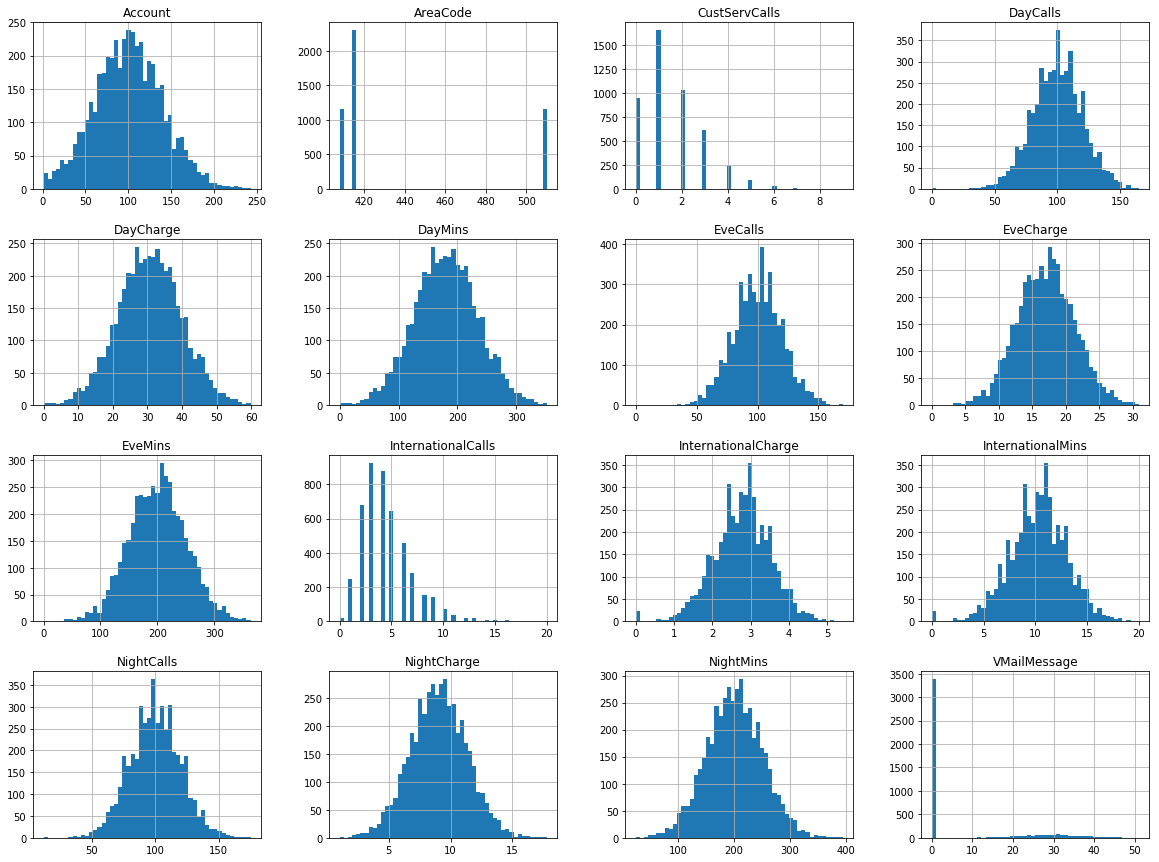

In [798]:
data.hist(bins=50,figsize=[20,15])
plt.show()

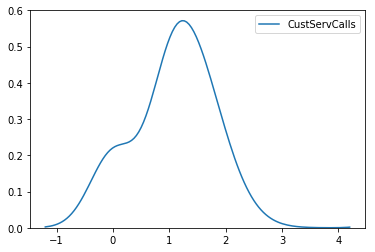

In [799]:
sns.kdeplot(np.sqrt(data['CustServCalls']),bw=0.4)

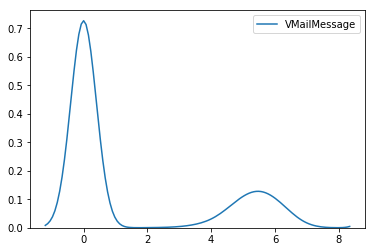

In [800]:
sns.kdeplot(np.sqrt(data['VMailMessage']),bw=0.4)

### To check for outliers in data

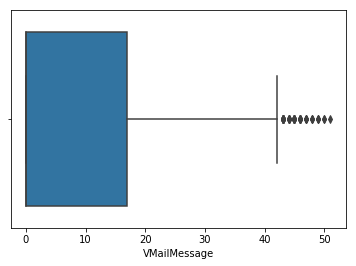

In [801]:
sns.boxplot((data['VMailMessage']))

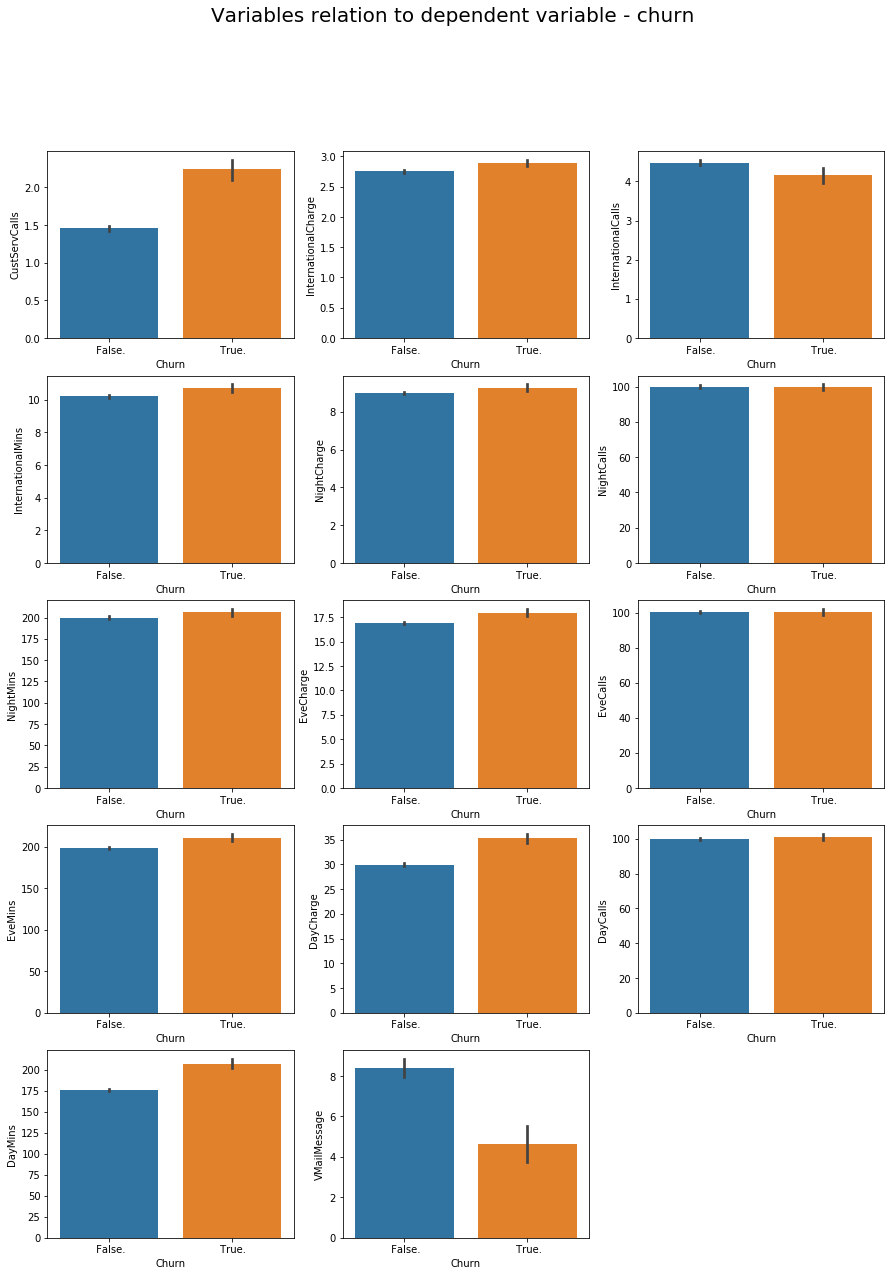

In [802]:
plt.figure(figsize = (15,20))
plt.subplot(5,3,1)
sns.barplot(data['Churn'], data['CustServCalls'])
plt.subplot(5,3,2)
sns.barplot(data['Churn'], data['InternationalCharge'])
plt.subplot(5,3,3)
sns.barplot(data['Churn'], data['InternationalCalls'])
plt.subplot(5,3,4)
sns.barplot(data['Churn'], data['InternationalMins'])
plt.subplot(5,3,5)
sns.barplot(data['Churn'], data['NightCharge'])
plt.subplot(5,3,6)
sns.barplot(data['Churn'], data['NightCalls'])
plt.subplot(5,3,7)
sns.barplot(data['Churn'], data['NightMins'])
plt.subplot(5,3,8)
sns.barplot(data['Churn'], data['EveCharge'])
plt.subplot(5,3,9)
sns.barplot(data['Churn'], data['EveCalls'])
plt.subplot(5,3,10)
sns.barplot(data['Churn'], data['EveMins'])
plt.subplot(5,3,11)
sns.barplot(data['Churn'], data['DayCharge'])
plt.subplot(5,3,12)
sns.barplot(data['Churn'], data['DayCalls'])
plt.subplot(5,3,13)
sns.barplot(data['Churn'], data['DayMins'])
plt.subplot(5,3,14)
sns.barplot(data['Churn'], data['VMailMessage'])
plt.suptitle("Variables relation to dependent variable - churn", fontsize = 20)
plt.show()

Text(0.5,1,'State vs Churn count')

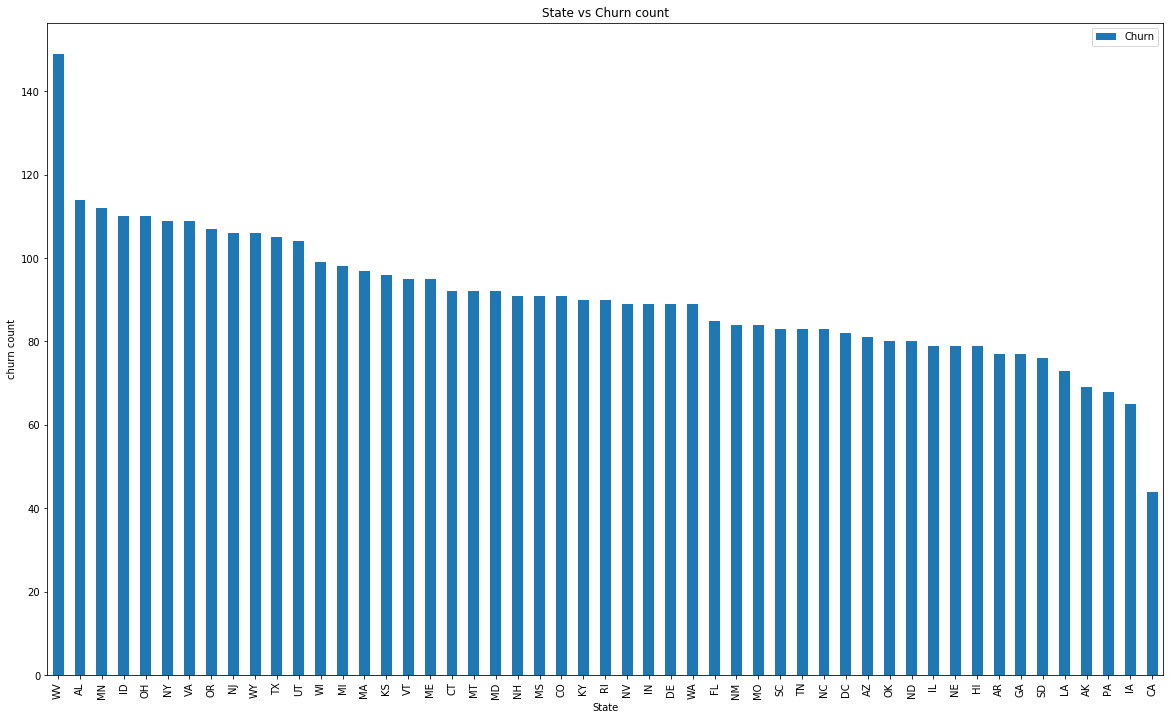

In [803]:
data.iloc[:,[0,-1]].groupby('State').count().sort_values('Churn',ascending=False).plot(kind='bar', figsize=(20,12))
plt.ylabel("churn count")
plt.title("State vs Churn count")

In [804]:
data1 = data.drop('Phone',axis=1)  ## Not having any significance for analysis

In [805]:
data1['InternationalCalls'] = np.sqrt(data1['InternationalCalls'])
data1['CustServCalls'] = np.sqrt(data1['CustServCalls'])
data1['VMailMessage'] = np.sqrt(data1['VMailMessage'])

In [806]:
#data1=pd.get_dummies(data1, columns=['State'])
#del data1['State_WY'] #n-1 dummies

In [807]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
State                  4617 non-null object
Account                4617 non-null int64
AreaCode               4617 non-null int64
InternationalPlan      4617 non-null object
VMailPlan              4617 non-null object
VMailMessage           4617 non-null float64
DayMins                4617 non-null float64
DayCalls               4617 non-null int64
DayCharge              4617 non-null float64
EveMins                4617 non-null float64
EveCalls               4617 non-null int64
EveCharge              4617 non-null float64
NightMins              4617 non-null float64
NightCalls             4617 non-null int64
NightCharge            4617 non-null float64
InternationalMins      4617 non-null float64
InternationalCalls     4617 non-null float64
InternationalCharge    4617 non-null float64
CustServCalls          4617 non-null float64
Churn                  4617 non-null object
dtypes:

## Converting categorical data to numerical data- Label encoding

In [808]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [809]:
data1.InternationalPlan = enc.fit_transform(data1.InternationalPlan)
data1.VMailPlan = enc.fit_transform(data1.VMailPlan)
data1.Churn = enc.fit_transform(data1.Churn)
data1.State = enc.fit_transform(data1.State)

## Model for Churn prediction

## Importing the sklearn packages

In [810]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Select X predictors and y target

In [811]:
X = data1.drop(['AreaCode','Churn'],axis=1).values
y = data1['Churn'].values

In [812]:
X.shape

(4617, 18)

## Splitting the dataset into 2-Training set and Test set

In [813]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [814]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [815]:
def accuracy_precision(cm):
    tp, fn, fp, tn = cm.ravel()
    accuracy=(tp+tn)/cm.sum()
    specificity=tn/(tn+fp)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    print("Accuracy: %s" %accuracy)
    print("Specificity: %s" %specificity)
    print("Precision: %s" %precision)
    print("Recall: %s" %recall)

### Prediction with Logistic regression

In [816]:
model1 = LogisticRegression(random_state=42)
model1.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [817]:
y_test_predict1 = model1.predict(X_test)
cm_test=confusion_matrix(y_test,y_test_predict1)
accuracy_precision(cm_test)

Accuracy: 0.8614718614718615
Specificity: 0.20382165605095542
Precision: 0.8851102941176471
Recall: 0.9649298597194389


In [818]:
pd.crosstab(y_test,y_test_predict1)

col_0,0,1
row_0,,
0,963,35
1,125,32


In [819]:
cf_matrix1 = pd.DataFrame(confusion_matrix(y_test, y_test_predict1), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"])
cf_matrix1

,Predicted False,Predicted True
Actual False,963,35
Actual True,125,32


##### Shows high False positive, which is not good.

###  Random Forest with Gridsearch CV

In [820]:
from sklearn.model_selection import GridSearchCV
model2 = RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3,4,5]}]
grid_search_rf=GridSearchCV(estimator=model2, param_grid=parameters, scoring='accuracy',cv=10)
grid_search_rf.fit(X_train,y_train)

best_parameters=grid_search_rf.best_params_
probs=grid_search_rf.predict_proba(X_test)

In [821]:
probs[0:10]

array([[0.92391304, 0.07608696],
       [1.        , 0.        ],
       [0.98550725, 0.01449275],
       [0.95652174, 0.04347826],
       [0.84782609, 0.15217391],
       [0.97826087, 0.02173913],
       [1.        , 0.        ],
       [0.17391304, 0.82608696],
       [0.94347826, 0.05652174],
       [0.92391304, 0.07608696]])

In [822]:
best_parameters

{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 2}

In [823]:
y_test_predict2 = grid_search_rf.predict(X_test)


In [824]:

cm_test=confusion_matrix(y_test,y_test_predict2)
accuracy_precision(cm_test)

Accuracy: 0.9593073593073593
Specificity: 0.7515923566878981
Precision: 0.9620991253644315
Recall: 0.9919839679358717


In [825]:
pd.crosstab(y_test,y_test_predict2)

col_0,0,1
row_0,,
0,990,8
1,39,118


In [826]:
cf_matrix2 = pd.DataFrame(confusion_matrix(y_test, y_test_predict2), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"])
cf_matrix2

,Predicted False,Predicted True
Actual False,990,8
Actual True,39,118


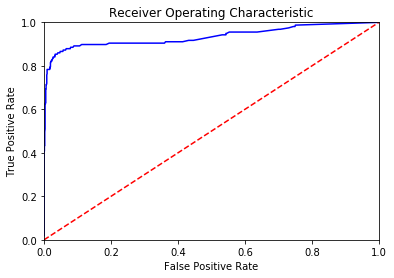

In [827]:
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [828]:
roc_auc_score(y_test,y_test_predict2)

0.8717881623118849